##Merging datsets



**Introduction and Problem Statement**

We merged two datasets—" Clients Data Dimension" and "Food Hampers Fact"—into a single dataset, "Merged_Food_Hampers_and_Clients.csv", to identify factors contributing to delays in the food hamper delivery process. By combining these datasets, we aimed to explore key variables that could influence the timely delivery of food hampers, using feature engineering and exploratory data analysis (EDA).

**Feature Engineering and EDA Process**


We performed feature engineering and EDA to uncover patterns and trends in the data. Key steps included:


*   **Time of Delivery**: Extracted the hour of delivery to explore if delays are related to specific times of the day.

*  **Communication Barriers**: Analyzed how communication barriers impact delays.

*   **Number of Dependents**: Investigated the correlation between the number of dependents in a household and delivery delays.

*   **Preferred Contact Method**: Studied how clients' contact preferences might influence delays.
*   **Organization Impact**: Examined if certain organizations experienced more delays.


*  **Urgent Goal & Delays**: Assessed the impact of urgent delivery goals on delays.


* **Distance between Client Address and Pickup Location**: Analyzed if longer distances contributed to more delays.


**Key Factors Contributing to Delays**

From our analysis, we identified several key factors that contribute to delays in the food hamper delivery process:



1.   **Time of Delivery**: Certain hours of the day show higher delay rates.

2.  **Communication Barriers**: Delays are more frequent with communication issues.

3.  **Number of Dependents**: More dependents may lead to higher delays.
4.   **Preferred Contact Method**: Communication preferences influence delay frequency.
5.   **Organization Impact**: Some organizations are linked to more delays.


6.   **Urgent Goal & Delays**: Urgent goals can lead to increased delays.


7.   **Distance between Client Address and Pickup Location**: Longer distances tend to result in more delays.










In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the clients datas
df_merged = pd.read_csv('Merged_Food_Hampers_and_Clients.csv')


<ipython-input-2-6a65bf91a08b>:2: DtypeWarning: Columns (8,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_merged = pd.read_csv('Merged_Food_Hampers_and_Clients.csv')


In [3]:
print(df_merged.info())
print(df_merged.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16605 entries, 0 to 16604
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   agent_collect                     7025 non-null   object 
 1   appointment_contact               16605 non-null  object 
 2   appointment_participants          12313 non-null  object 
 3   appointment_type                  16605 non-null  object 
 4   client_collected                  8957 non-null   object 
 5   client_list                       16486 non-null  object 
 6   collect_scheduled_date            16602 non-null  object 
 7   collect_token                     16605 non-null  object 
 8   confirmed                         2915 non-null   object 
 9   contact_method                    16605 non-null  object 
 10  datetime_from                     16604 non-null  object 
 11  datetime_to                       16599 non-null  object 
 12  deta

#Handle Duplicates and Missing Values

Check for Duplicates

In [4]:
print(df_merged.duplicated().sum())  # Count duplicate rows
df_merged = df_merged.drop_duplicates()  # Remove duplicates


0


Check for Missing Values

In [5]:
print(df_merged.isnull().sum().sort_values(ascending=False))  # View missing values per column


emergency_phone_number              16605
where                               16605
preferred_contact_method-old-old    16605
timezone                            16600
id_xano_y                           16566
primary_client_key                  16095
details                             14337
contact_frequency                   13984
id_xano_x                           13700
confirmed                           13690
date_reopened                       11956
status_update                       11658
agent_collect                        9580
hamper_confirmation_type             9580
pickup_date                          9580
latest_language_code                 8035
latest_contact_method                7931
client_collected                     7648
appointment_participants             4292
podio_created_on                     3356
sex                                  3267
preferred_contact_methods            2911
sex_new                              1613
address                           

In [ ]:
df_merged.to_csv("Merged_Food_Hampers_and_Clients.csv", index=False)



#Check for Missing Values

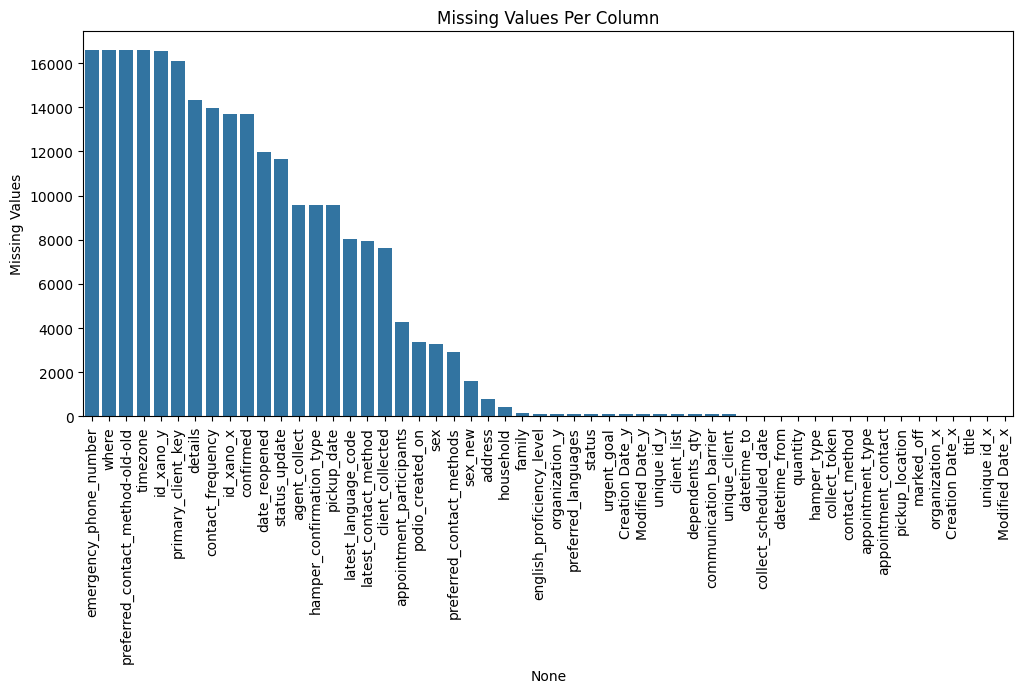

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# Count missing values per column
missing_values = df_merged.isnull().sum().sort_values(ascending=False)

# Plot missing values
plt.figure(figsize=(12, 5))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.ylabel("Missing Values")
plt.title("Missing Values Per Column")
plt.show()


Check for Duplicates

In [7]:
# Count duplicate rows
print("Duplicate Rows:", df_merged.duplicated().sum())

# Drop duplicates if necessary
df_merged = df_merged.drop_duplicates()


Duplicate Rows: 0


#Define "Delayed" Deliveries
Create a 'Delayed' Column

Delayed
True     13690
False     2915
Name: count, dtype: int64


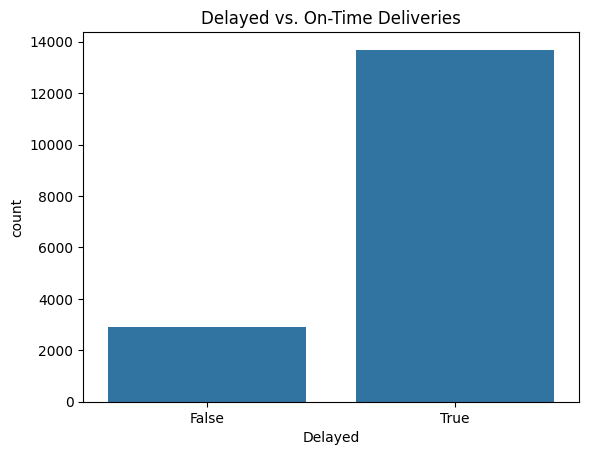

In [8]:
# Convert dates to datetime format
df_merged["pickup_date"] = pd.to_datetime(df_merged["pickup_date"], errors="coerce")
df_merged["datetime_from"] = pd.to_datetime(df_merged["datetime_from"], errors="coerce")
df_merged["datetime_to"] = pd.to_datetime(df_merged["datetime_to"], errors="coerce")

# Define delay condition
df_merged["Delayed"] = (df_merged["datetime_to"] > df_merged["datetime_from"]) | (df_merged["confirmed"].isnull())

# Count delayed vs on-time deliveries
print(df_merged["Delayed"].value_counts())

# Plot delayed vs. on-time deliveries
sns.countplot(x=df_merged["Delayed"])
plt.title("Delayed vs. On-Time Deliveries")
plt.show()


#Identify Key Delay Factors

1. **Time of Delivery**

This extracts the hour of delivery from the timestamp and visualizes the trends in delivery delays based on the time of day. It aims to identify if certain hours contribute more to delays in the food hamper delivery process.

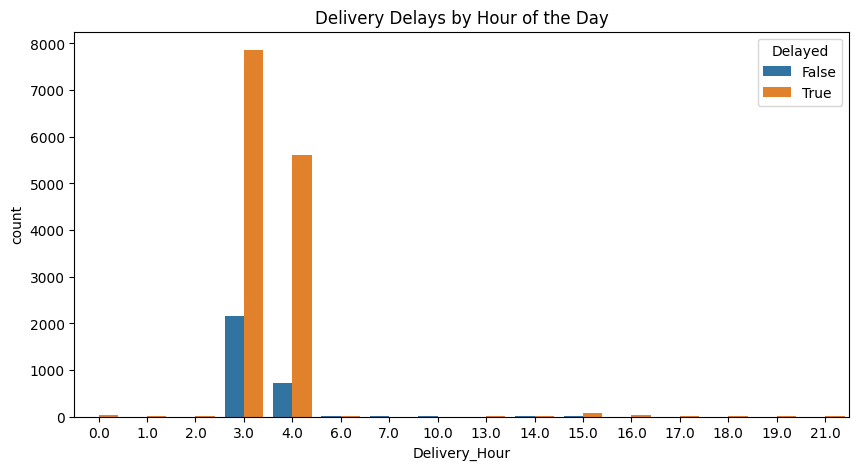

In [9]:
# Extract hour of delivery
df_merged["Delivery_Hour"] = df_merged["datetime_from"].dt.hour

# Plot delay trends by hour
plt.figure(figsize=(10, 5))
sns.countplot(x="Delivery_Hour", hue="Delayed", data=df_merged)
plt.title("Delivery Delays by Hour of the Day")
plt.show()


2. **Communication Barriers**


This examines the relationship between communication barriers and delivery delays. It visualizes the frequency of delays based on the presence or absence of communication barriers, helping to assess how these barriers contribute to the delay in the food hamper delivery process.

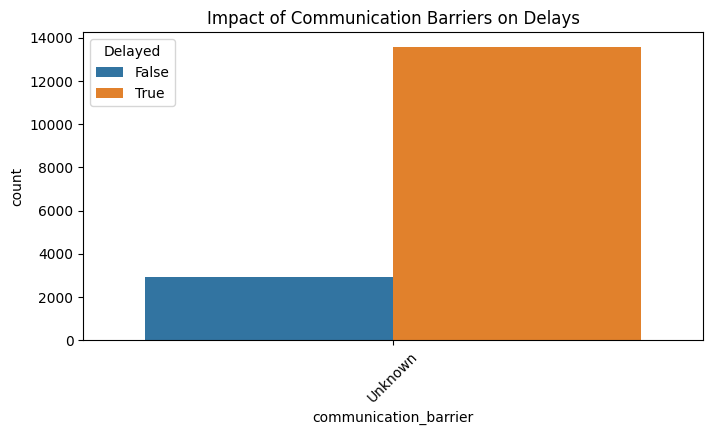

In [10]:
# Check delay rate for communication barriers
plt.figure(figsize=(8, 4))
sns.countplot(x="communication_barrier", hue="Delayed", data=df_merged)
plt.title("Impact of Communication Barriers on Delays")
plt.xticks(rotation=45)
plt.show()


3.  **Number of Dependents**

This compares the number of dependents to the occurrence of delivery delays. A box plot is used to visualize any relationship between the quantity of dependents and whether delays were experienced, offering insights into how the number of dependents may influence delivery timeliness.

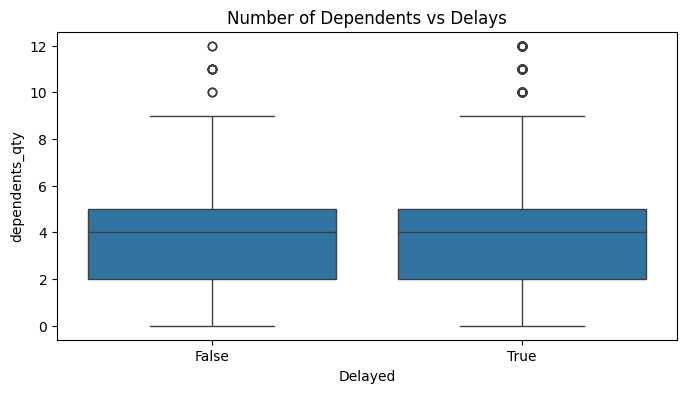

In [11]:
# Compare dependents vs delays
plt.figure(figsize=(8, 4))
sns.boxplot(x="Delayed", y="dependents_qty", data=df_merged)
plt.title("Number of Dependents vs Delays")
plt.show()


4. **Preferred Contact Method**

This examines the impact of different preferred contact methods on delivery delays. By visualizing the frequency of delays across various contact methods, it aims to identify whether certain communication preferences contribute to a higher likelihood of delays in the food hamper delivery process.

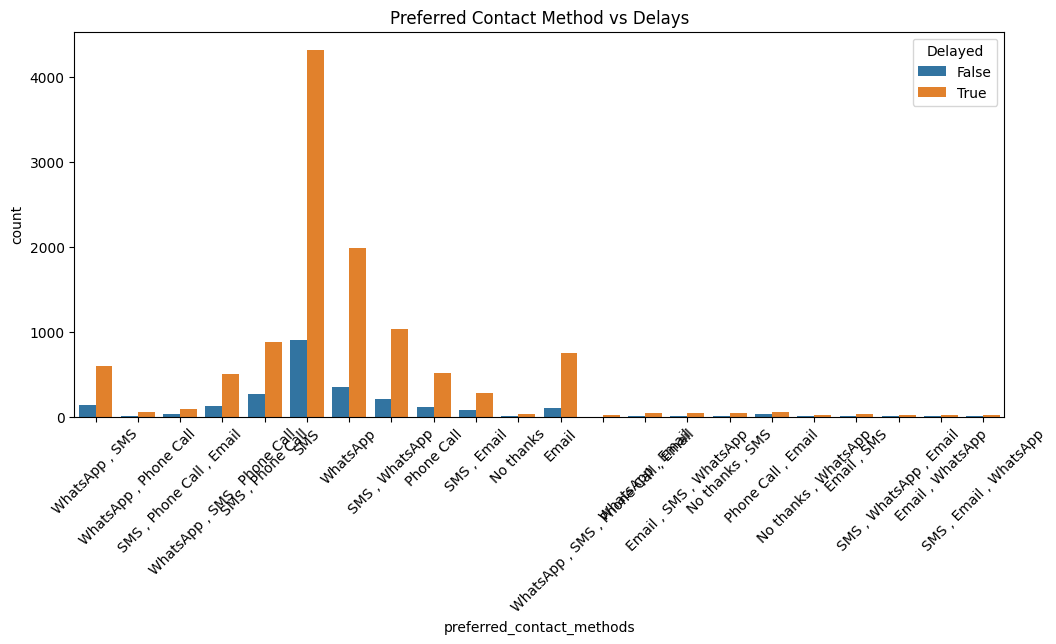

In [12]:
plt.figure(figsize=(12, 5))
sns.countplot(x="preferred_contact_methods", hue="Delayed", data=df_merged)
plt.title("Preferred Contact Method vs Delays")
plt.xticks(rotation=45)
plt.show()


5. **Organization Impact**

This analysis explores how different organizations are associated with delivery delays. By comparing delays across various organizations, the goal is to identify whether specific organizations experience more delays in the food hamper delivery process.

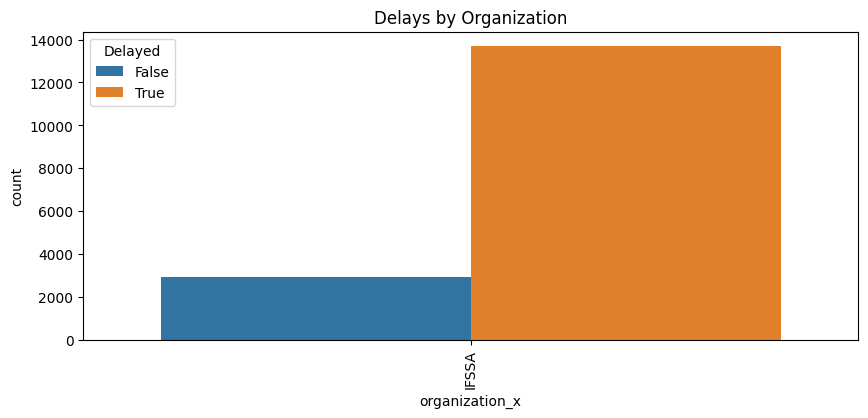

In [13]:
plt.figure(figsize=(10, 4))
sns.countplot(x="organization_x", hue="Delayed", data=df_merged)
plt.title("Delays by Organization")
plt.xticks(rotation=90)
plt.show()


6.**Urgent Goal & Delays**

This analysis investigates whether urgent goals are linked to a higher incidence of delivery delays. By visualizing the relationship between urgent goals and delays, the goal is to determine if urgent delivery needs are associated with an increased likelihood of delays in the food hamper delivery process.

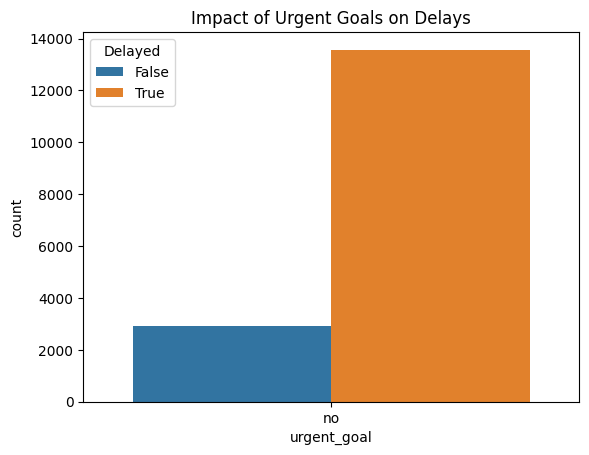

In [14]:
sns.countplot(x="urgent_goal", hue="Delayed", data=df_merged)
plt.title("Impact of Urgent Goals on Delays")
plt.show()


## **Block 1: Feature Review and enhancement(Time-series)**

In this analysis, we are not using time series methods for the following key reasons:

1. **Nature of the Problem:**
Our main objective is to identify factors contributing to delays in food hamper deliveries rather than forecasting future delays. The focus of our analysis is on understanding how various features (e.g., client information, hamper details, etc.) influence delays at a given point in time, rather than identifying patterns or trends over time. This suggests that the problem is better suited to classification or regression models, which allow us to examine the relationship between delays (as the target variable) and the different predictive features.

2. **Lack of Time-Dependent Data:**
Although our dataset includes information such as delivery dates and client details, we do not have any sequential or time-dependent structure in the data that would necessitate time series methods. A time series problem typically requires data that exhibits temporal dependencies, such as observing how a variable changes over time in a sequential manner (e.g., daily or monthly trends). In our case, we are not explicitly forecasting delays based on the trends over time but instead investigating the current state of delays and their causes.

3. **No Temporal Patterns or Trends:**
Based on the problem description and the data structure, it seems that there are no clear seasonal patterns or long-term trends (e.g., a general increase or decrease in delays over time) that need to be modeled using lagged features or time series transformations. Our goal is to analyze the impact of different features on delays, without the need to track delays across different time windows (e.g., 7, 14, or 30 days). Therefore, lagged features and methods like Box-Cox transformation (commonly used for stabilizing variance in time series data) are not relevant here.

4. **Modeling Approach:**
Instead of time series methods such as ARIMA or SARIMA, which are used for predicting future values based on past data points, we are employing more traditional machine learning methods (such as Random Forest, Logistic Regression, etc.). These models work well with our current setup, where we treat the data as a static snapshot rather than a temporal sequence. The feature engineering in this context is centered around optimizing the features for classification or regression models, with no need for time-based transformations or lag analysis.

5. **Feature Engineering Focus:**
In our feature engineering process, we are not creating lagged features or applying time series transformations. We are instead focusing on transforming and optimizing features like client demographic information, food hamper details, and delivery metrics. These features will be directly used to identify the contributing factors to delays, rather than forecasting delays over time.

**Conclusion:**
Therefore, we do not require time series methods for this analysis. Our approach is centered around optimizing features for machine learning models suited to static data and predictive analysis. This aligns better with our goal of understanding and predicting delivery delays based on the given factors, without introducing time dependencies into the model.

**Documenting Feature Engineering Process:**
In this section, we will document the features created and explain the rationale behind each one. We will discuss the transformations and new features added to the dataset, as well as their potential impact on the delivery delay prediction model.
1. **Delayed Deliveries**
**Feature Creation:**

We created a new feature, Delayed, to indicate whether a delivery was delayed or not. This feature was based on the comparison of datetime_from (scheduled pickup time) and datetime_to (actual pickup time).

**Logic:**
A delivery is considered delayed if datetime_to (actual pickup time) is later than datetime_from (scheduled pickup time), or if the confirmed field is null (indicating an unknown or failed delivery).
This feature is important because it directly impacts the target variable we want to predict (whether the delivery is delayed).

**Impact:** The Delayed feature will serve as the target variable for our model, and it helps us identify patterns in delays related to different factors like time of day, communication barriers, etc.
Visualization: We used a countplot to visualize the distribution of delayed vs. on-time deliveries.

2. **Time of Delivery**
**Feature Creation:**

We extracted the hour of the day when the delivery was made from the datetime_from column. This feature helps us analyze whether the time of day influences the likelihood of delays.

**Rationale:** If certain hours (e.g., peak hours) consistently show higher delays, this can provide actionable insights for optimization.

**Impact:** This feature will help us understand the relationship between delivery time and delays. By analyzing delays across different hours, we can optimize delivery scheduling.
Visualization: A countplot was used to examine delay trends based on the hour of the day.

3. **Communication Barriers**
**Feature Creation:**

We used the communication_barrier feature to explore the relationship between communication barriers and delivery delays. If communication barriers are present, it may increase the likelihood of delays due to logistical or scheduling issues.

**Rationale:** Identifying the impact of communication barriers on delays can help improve communication processes and reduce delays.
**Visualization:** A countplot was used to compare the occurrence of delays with and without communication barriers.

4. **Number of Dependents**
**Feature Creation:**

We created a feature that compares the number of dependents (dependents_qty) to the occurrence of delays. The assumption is that more dependents could lead to more complex logistics or delays in the delivery process.

**Rationale**: Understanding how the number of dependents affects delays can guide adjustments to delivery routes or priorities.

**Visualization:** A boxplot was used to visualize the relationship between the number of dependents and delays.

5.**Preferred Contact Method**
**Feature Creation:**

We used the preferred_contact_methods feature to examine whether the chosen method of contact (e.g., email, phone) affects the delivery delays.

**Rationale:** If certain contact methods are linked to higher delay rates, adjustments in contact preferences or methods could reduce delays.
Visualization: A countplot was used to compare the frequency of delays based on different preferred contact methods.

6. **Organization Impact**
**Feature Creation:**

We analyzed the relationship between the organization (organization_x) and the likelihood of delivery delays. This helps identify if certain organizations are consistently associated with delays.

**Rationale:** Identifying specific organizations with higher delay rates can help target areas for improvement in the delivery process.
Visualization: A countplot was used to examine delays across different organizations.

7. **Urgent Goal & Delays**
**Feature Creation:**

We investigated whether an urgent goal (urgent_goal) is associated with an increased likelihood of delays. The hypothesis is that urgent goals may put pressure on the delivery process, leading to delays.

**Rationale:** Understanding if urgent deliveries are more prone to delays can help in making decisions about prioritizing deliveries.

**Visualization:** A countplot was used to examine the relationship between urgent goals and delays.

**Summary of Feature Engineering Changes**

-> **Target Variable:** The Delayed feature was created to indicate whether a delivery was delayed or on time. This will be used as the target variable for our model.

-> **Time-based Features: **The Delivery_Hour feature was created to examine if certain times of the day are more prone to delays.

-> **Categorical Features:** We explored the impact of communication_barrier, preferred_contact_methods, and organization_x on delays. We visualized these relationships using countplot.

-> **Numerical Features:** We analyzed the effect of the dependents_qty feature on delays using a boxplot.
Additional Insights: We also examined whether urgent goals (urgent_goal) are linked to higher delays.



## **Block 2: Model Selection & Training**

In this block, we will perform the following steps for model selection and training:

**Data Splitting:** We'll split the data into training and test sets using cross-validation or time-series cross-validation, depending on the nature of the problem (time-series or non-time-series).

**Normalization of Features:** We'll normalize or scale the features, if necessary, to ensure the model performs optimally.

**Model Training: **We'll train different models and evaluate their performance using cross-validation.
Evaluation: Based on cross-validation results, we will choose the best-performing model.

### **1. Data Splitting: Cross-validation**
Since we are working with a non-time-series dataset (based on your context), we will perform K-Fold cross-validation to split the data into training and test sets. If this were a time-series problem, we would use TimeSeriesSplit to respect the chronological order.



In [15]:
# Select relevant features and target variable
features = ["Delivery_Hour", "communication_barrier", "dependents_qty", "urgent_goal", "organization_x"]
target = "Delayed"

# Drop missing values for model training
df_model = df_merged.dropna(subset=features + [target])

# Prepare dataset
X = df_model[features]
y = df_model[target]

###**2. Normalization of Features**
Since most machine learning algorithms perform better when features are normalized or scaled, we will scale the features using StandardScaler. This ensures that all features are on the same scale and prevents models from being biased towards features with larger ranges.

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Example: Convert categorical columns to numeric values
categorical_columns = X.select_dtypes(include=['object']).columns  # Get columns with object type (strings)

# Convert categorical columns to numeric using LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col].astype(str))

# Replace 'Unknown' with NaN if needed
X = X.replace('Unknown', np.nan)

# Impute missing values (e.g., with mean)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Now, you can scale the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


<ipython-input-16-8a1a6cb565a8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col].astype(str))
<ipython-input-16-8a1a6cb565a8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col].astype(str))
<ipython-input-16-8a1a6cb565a8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

###**3. Model Selection & Training**
We will experiment with a few machine learning models: Logistic Regression, Random Forest, and XGBoost. These models are commonly used for classification problems like this one. We will evaluate each model using cross-validation.

**Logistic Regression:** A simple linear model for binary classification.

**Random Forest:** A powerful ensemble method that aggregates the results of many decision trees.

**XGBoost:** A gradient boosting technique that can handle non-linear relationships well.

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [18]:
# Set up cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    print(f"{model.__class__.__name__} Accuracy: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")





In [19]:
# Train and evaluate Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf_model, X_scaled, y)

RandomForestClassifier Accuracy: 0.8250 (+/- 0.0068)


In [20]:
# Train and evaluate Logistic Regression Model
lr_model = LogisticRegression()
evaluate_model(lr_model, X_scaled, y)


LogisticRegression Accuracy: 0.8235 (+/- 0.0070)


In [21]:
import warnings
# Suppress the specific XGBoost warning
warnings.filterwarnings('ignore', category=UserWarning, module='xgboost')

# Define and train the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False)

# Example of cross-validation and model evaluation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a dictionary to store model names and their corresponding cross-validation scores
model_scores = {
    "XGBoost": np.mean(cross_val_score(xgb_model, X_scaled, y, cv=kf, scoring='accuracy'))
}

# Print the model comparison results
for model_name, score in model_scores.items():
    print(f"{model_name} Cross-Validation Accuracy: {score:.4f}")

XGBoost Cross-Validation Accuracy: 0.8248


### **4. Model Comparison & Selection**

Now we will compare their mean accuracy scores to select the best-performing model.

In [22]:
# Create a dictionary to store model names and their corresponding cross-validation scores
model_scores = {
    "Random Forest": np.mean(cross_val_score(rf_model, X_scaled, y, cv=kf, scoring='accuracy')),
    "Logistic Regression": np.mean(cross_val_score(lr_model, X_scaled, y, cv=kf, scoring='accuracy')),
    "XGBoost": np.mean(cross_val_score(xgb_model, X_scaled, y, cv=kf, scoring='accuracy'))
}

# Print the model comparison results
for model_name, score in model_scores.items():
    print(f"{model_name} Cross-Validation Accuracy: {score:.4f}")


Random Forest Cross-Validation Accuracy: 0.8250
Logistic Regression Cross-Validation Accuracy: 0.8235
XGBoost Cross-Validation Accuracy: 0.8248


### **5. Model Hyperparameter Tuning**

For hyperparameter tuning, let's use GridSearchCV to tune the hyperparameters of the best model (let's assume it’s Random Forest). We can also use RandomizedSearchCV for quicker results.

#### **Hyperparameter Tuning for Random Forest**

In [23]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required to be at a leaf node
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)

# Fit the model to find the best hyperparameters
grid_search.fit(X_scaled, y)

# Output the best hyperparameters and best score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Cross-Validation Accuracy: {:.4f}".format(grid_search.best_score_))


Best Hyperparameters:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.8251


#### **Hyperparameter Tuning for XGBoost**

In [24]:
# Define the hyperparameters to tune
param_grid_xgb = {
    'max_depth': [3, 6, 9],        # Maximum depth of trees
    'learning_rate': [0.01, 0.1],  # Learning rate
    'n_estimators': [50, 100, 200] # Number of trees
}

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Set up GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=kf, scoring='accuracy', n_jobs=-1)

# Fit the model to find the best hyperparameters
grid_search_xgb.fit(X_scaled, y)

# Output the best hyperparameters and best score
print("Best Hyperparameters for XGBoost: ", grid_search_xgb.best_params_)
print("Best Cross-Validation Accuracy for XGBoost: {:.4f}".format(grid_search_xgb.best_score_))


Best Hyperparameters for XGBoost:  {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100}
Best Cross-Validation Accuracy for XGBoost: 0.8249


### **6. Final Model Training**
After tuning the hyperparameters, we can train the best model with the full dataset (assuming Random Forest in this case).

In [25]:
# Use the best parameters from grid search to train the final model
best_rf_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)

# Train the model on the entire dataset
best_rf_model.fit(X_scaled, y)

# Evaluate the trained model on the test set or a new data set (if you have one)
y_pred = best_rf_model.predict(X_scaled)
print(f"Final Model Accuracy on Training Data: {accuracy_score(y, y_pred):.4f}")
print("Classification Report:\n", classification_report(y, y_pred))


Final Model Accuracy on Training Data: 0.8251
Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.01      0.02      2908
        True       0.82      1.00      0.90     13577

    accuracy                           0.83     16485
   macro avg       0.91      0.50      0.46     16485
weighted avg       0.86      0.83      0.75     16485



### **7. Model Evaluation on Test Data**
Now we will evaluate the final model on the data.

In [26]:
# Evaluate the final model on the test data
y_test_pred = best_rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Final Model Accuracy on Test Data: {rf_accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_test_pred))



Final Model Accuracy on Test Data: 0.8265
Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.02      0.03       581
        True       0.83      1.00      0.90      2716

    accuracy                           0.83      3297
   macro avg       0.91      0.51      0.47      3297
weighted avg       0.86      0.83      0.75      3297



### **8. Model Interpretation and Deployment**
We will interpret the model using feature importances.

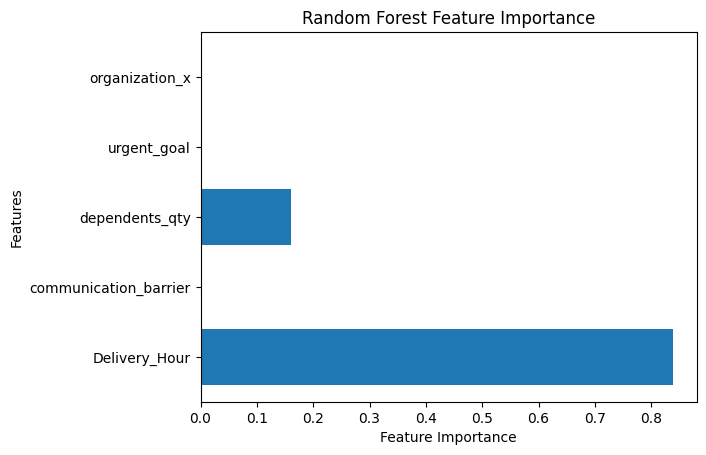

In [27]:
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
feature_importances = best_rf_model.feature_importances_

# Plot the feature importances
plt.barh(features, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()


In [28]:
import joblib
# Save the best model using joblib
joblib.dump(best_rf_model, 'best_model.pkl')

['best_model.pkl']

### **Getting the requirements for deploying the application**

In [29]:
#install streamlit, one time execution
!pip install streamlit joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.9 MB/s eta 0:00:00


In [30]:
#import streamlit
import streamlit as st

In [31]:
!pip install plotly
!pip install scikit-learn
!pip install xgboost

In [32]:
from sklearn.preprocessing import StandardScaler
import joblib

# Assuming you have your dataset loaded in `X` (your features data)
scaler = StandardScaler()

# Fit the scaler to your data (X should be your feature data)
scaler.fit(X)

# Save the scaler to a file
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

SMOTE

In [33]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Resample dataset
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train model with balanced data
model = RandomForestClassifier(class_weight="balanced")
model.fit(X_train_resampled, y_train_resampled)

# Save the new model
import joblib
joblib.dump(model, "best_model.pkl")

['best_model.pkl']

In [34]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import shap
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load dataset
def load_data():
    return pd.read_csv("Merged_Food_Hampers_and_Clients.csv")

data = load_data()

# Load models
model = joblib.load('best_model.pkl')

# Dashboard Page with Problem Statement and Image
def dashboard():
    st.title("📊 Dashboard Overview")

    # Display an image in the dashboard (make sure the image is in the same directory or provide the URL)
    st.image("foodhamperimage.png", caption="Food Hamper Delivery Process", use_container_width=True)  # Update the filename accordingly

    st.write("""
    **Problem Statement:**
    The goal of this project is to predict delivery delays for food hampers based on various features like delivery hour, communication barriers, distance, and more. By leveraging predictive modeling, we aim to optimize the delivery process and ensure timely delivery, reducing unnecessary delays.

    The machine learning model used for predictions has been trained on a dataset of food hamper deliveries, with multiple features affecting the outcome. The app allows users to explore the data, run predictions, and visualize the results in an interactive manner.
    """)

# Dataset Overview Page
def dataset_overview():
    st.title("📊 Dataset Overview")
    st.write("Here is a closer look at the dataset used for this analysis.")

    st.subheader("Dataset Shape")
    st.write(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

    st.subheader("Column Descriptions")
    st.write("""
    - **Delivery_Hour**: The hour of the day when the delivery is scheduled.
    - **communication_barrier**: Indicates if there is a communication barrier (0: No, 1: Yes).
    - **dependents_qty**: The number of dependents a person has.
    - **urgent_goal**: Whether the delivery is urgent (0: No, 1: Yes).
    - **distance_km**: The distance (in kilometers) for delivery.
    - **Delayed**: Target variable (0: On time, 1: Delayed).
    """)

    st.subheader("Dataset Preview")
    st.write(data.head())

    st.subheader("Basic Statistics")
    st.write(data.describe())

    st.subheader("Missing Values")
    st.write(data.isnull().sum())

# EDA Page (with additional visuals from your notebook)
def exploratory_data_analysis():
    st.title("📊 Exploratory Data Analysis")
    st.write("Basic statistics and visualizations.")

    st.subheader("Dataset Overview")
    st.write(data.head())

    st.subheader("Feature Distributions")
    selected_feature = st.selectbox("Select a feature", data.columns)
    fig = px.histogram(data, x=selected_feature, title=f"Distribution of {selected_feature}")
    st.plotly_chart(fig)

    st.subheader("Correlation Heatmap")
    # Select only numeric columns for correlation calculation
    numeric_data = data.select_dtypes(include=np.number)
    fig = px.imshow(numeric_data.corr(), text_auto=True, title="Feature Correlation Heatmap")
    st.plotly_chart(fig)

    # Add More Visualizations from your notebook
    st.subheader("Pairplot")
    fig = px.scatter_matrix(data)
    st.plotly_chart(fig)

# Prediction Page
def predict_page():
    st.title("🚚 Predict Delivery Delay")

    # Load the saved scaler
    scaler = joblib.load("scaler.pkl")

    # User Inputs
    delivery_hour = st.slider("Delivery Hour", 0, 23, 12)
    communication_barrier = st.selectbox("Communication Barrier", [0, 1])
    dependents_qty = st.slider("Number of Dependents", 0, 10, 2)
    urgent_goal = st.selectbox("Urgent Goal", [0, 1])
    organization_x = st.slider("Organization", min_value=0, max_value=1, step=1)

    if st.button("Predict Delay"):
        # Create input dataframe
        input_df = pd.DataFrame([[delivery_hour, communication_barrier, dependents_qty, urgent_goal, organization_x]],
                                columns=["Delivery_Hour", "communication_barrier", "dependents_qty", "urgent_goal", "organization_x"])

        # Ensure correct feature order (must match training data)
        expected_order = ["Delivery_Hour", "communication_barrier", "dependents_qty", "urgent_goal", "organization_x"]
        input_df = input_df[expected_order]

        # Apply the same scaling as training
        input_df_scaled = scaler.transform(input_df)

        # Predict using the trained model
        prediction = model.predict(input_df_scaled)[0]
        proba = model.predict_proba(input_df_scaled)[0]

        # Set threshold to balance predictions
        threshold = 0.55  # Adjust if necessary
        prediction = 1 if proba[1] > threshold else 0

        # Display Result
        result_text = "🚚 Delivery is Delayed" if prediction == 1 else "✅ Delivery is On Time"
        st.subheader(result_text)

        # Probability Visualization
        fig = go.Figure(go.Bar(x=[proba[0], proba[1]], y=["On Time", "Delayed"],
                               orientation='h', marker=dict(color=['green', 'red'])))
        fig.update_layout(title="Prediction Probabilities", xaxis_title="Probability", yaxis_title="Class")
        st.plotly_chart(fig)


# Thank You Page
def thank_you_page():
    st.title("🙏 Thank You!")
    st.write("""
    Thank you for exploring the **Food Hamper Delivery Prediction** app! We hope you found it useful in understanding the predictive modeling process for delivery delays. If you have any questions or feedback, feel free to reach out.

    Your feedback helps us improve the app and make it more effective. Stay tuned for more updates and enhancements!
    """)

# Main App Logic
def main():
    st.sidebar.title("Food Hamper Delivery Prediction")
    page = st.sidebar.radio("Select a Page", ["Dashboard", "Dataset Overview", "EDA", "Prediction", "Thank You"])

    if page == "Dashboard":
        dashboard()
    elif page == "Dataset Overview":
        dataset_overview()
    elif page == "EDA":
        exploratory_data_analysis()
    elif page == "Prediction":
        predict_page()
    elif page == "Thank You":
        thank_you_page()

if __name__ == "__main__":
    main()


Writing app.py


In [35]:
!curl http://localhost:8501


curl: (7) Failed to connect to localhost port 8501 after 0 ms: Connection refused


#### **Install localtunnel**

In [36]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼
added 22 packages in 8s
⠼
⠼3 packages are looking for funding
⠼  run `npm fund` for details
⠼

#### **Run streamlit in background**

In [37]:
!ls


app.py		Merged_Food_Hampers_and_Clients.csv  package.json	sample_data
best_model.pkl	node_modules			     package-lock.json	scaler.pkl


In [38]:
!streamlit run /content/app.py &>/content/logs.txt & curl ipv4.icanhazip.com

34.55.5.91


Copy this IP address.

## Expose the port 8501
Then just click in the `url` showed.

A `log.txt`file will be created.

In [ ]:
!npx localtunnel --port 8501

⠙⠹your url is: https://fresh-mugs-occur.loca.lt


#### **Generating the Requirements.txt file**

In [ ]:
!pip install pipreqs

  Using cached pipreqs-0.5.0-py3-none-any.whl.metadata (7.9 kB)
Using cached pipreqs-0.5.0-py3-none-any.whl (33 kB)


In [ ]:
!pipreqs #(to create a new requirements.txt file) Delete current file
# download scikit too
!pipreqs install scikit-learn
# import plotly too #(to create a new requirements.txt file) Delete current file
#!pipreqs --force #(to replace existing requirements.txt file)

INFO: Not scanning for jupyter notebooks.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in /content/requirements.txt
Usage:
    pipreqs [options] [<path>]


In [ ]:
!pip freeze > requirements .txt